SVM ( Linear kernel )
    - Without crossvalidation
    - With Grid Search
    - With Cross val score.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

from sklearn import svm
import scikitplot as skplt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import glmnet


In [3]:
# reading csv file
cells = pd.read_csv('CellDNA.csv',header=None)

In [4]:
#checking dataset
cells.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7


In [5]:
# Checking count of labels
cells.iloc[:,13].value_counts()

0     1017
10      20
9       20
8       20
7       20
6       20
5       20
4       20
3       20
2       20
1       20
Name: 13, dtype: int64

In [6]:
#Making this dataset into a binary classifiaction with 0 representing non interesting bacterium and 1 representing interesting bacterium
def make_class1(i):
    if i >=1:
        return 1
    else:
        return 0

cells.iloc[:,13] = cells.iloc[:,13].apply(make_class1)
    

In [8]:
#sanity check
cells.iloc[:,13].value_counts()

0    1017
1     200
Name: 13, dtype: int64

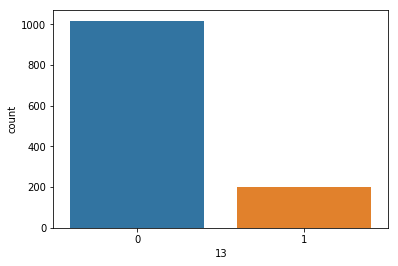

In [9]:
#Plotting target variable
sns.countplot(cells.iloc[:,13])

In [11]:
# Splitting into X and Y
X = cells.iloc[:,0:13]
Y = cells.iloc[:,13]

In [12]:
X.shape

(1217, 13)

### Preprocessing - Standardizing the numeric variables

In [13]:
# Standardization of numeric data of the dataset
scaler = preprocessing.StandardScaler().fit(X)

In [14]:
print('scaler mean: \n',scaler.mean_,'\n' ,'scaler scale:',scaler.scale_)

scaler mean: 
 [  2.00366475e+02   4.19476953e+02   2.11335155e+02   3.33885991e+01
   9.37693852e+00   9.08627983e-01   1.60336743e-01   2.02640099e+02
   5.16844700e-01   1.52889294e+01   7.75537882e-01   4.74787841e-01
   7.89281980e+01] 
 scaler scale: [  1.35609899e+02   2.15475339e+02   1.41534633e+02   1.91442731e+01
   3.63347577e+00   1.10896130e-01   5.05686512e+01   1.42527382e+02
   2.07102813e+00   4.62202953e+00   1.17753713e-01   1.58276178e-01
   4.87784954e+01]


In [15]:
X_scaled = scaler.transform(X)

In [16]:
print('Xscaled mean: \n',X_scaled.mean(axis=0) ,'\n' ,'Xscaled scale:',X_scaled.std(axis=0))

Xscaled mean: 
 [  4.08693439e-17   7.00617324e-17  -4.08693439e-17   1.26986890e-16
  -1.08011837e-16   1.49829934e-15   4.37885827e-18   5.83847770e-17
  -6.42232547e-17   5.19624515e-16  -5.19624515e-16   5.83847770e-18
  -7.44405906e-17] 
 Xscaled scale: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [17]:
X_scaled = pd.DataFrame(X_scaled)

In [19]:
#sanity check
X_scaled.shape

(1217, 13)

### Preprocessing - Splitting dataset into train and test data

In [20]:
#Shuffling data
X_shuffle, Y_shuffle = shuffle(X_scaled, Y, random_state=121)

In [27]:
#Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_shuffle, Y_shuffle, test_size=0.20, random_state=121)

### SVM without cross validation

In [41]:
#for c in range(100,1000,100):
clf = svm.SVC(kernel='linear',C=500,probability=True)
clf.fit(X_train,Y_train)
print( 'clf.coef_' , clf.coef_)
print('clf.n_support_' , clf.n_support_)



clf.coef_ [[ -6.06684738e-01   1.29486291e-01  -2.57510314e-04   2.63383777e-01
   -1.59833200e+00   1.23817394e+01  -2.87475501e-01   9.25569093e-02
    5.86636069e-01   1.21566524e+00  -2.33148595e-01   1.65816457e-01
    4.51817563e-01]]
clf.n_support_ [87 84]


In [42]:
clf.classes_

array([0, 1])

In [43]:
clf.coef_

array([[ -6.06684738e-01,   1.29486291e-01,  -2.57510314e-04,
          2.63383777e-01,  -1.59833200e+00,   1.23817394e+01,
         -2.87475501e-01,   9.25569093e-02,   5.86636069e-01,
          1.21566524e+00,  -2.33148595e-01,   1.65816457e-01,
          4.51817563e-01]])

In [44]:
clf.n_support_

array([87, 84], dtype=int32)

In [45]:
clf.support_vectors_

array([[ 0.89693692,  0.49772122,  0.64181294, ..., -0.57616505,
         0.36293247,  0.858284  ],
       [-0.14281019,  1.16206326, -0.15749471, ..., -0.20806595,
        -0.16209847, -0.14219787],
       [ 0.85269236, -0.15427648, -1.00552186, ..., -1.72456655,
        -0.57973056,  1.05088936],
       ..., 
       [ 1.50161254, -0.14334747, -0.42611763, ..., -0.54580255,
        -0.91436679,  1.12448737],
       [ 0.49136181,  0.57996771, -0.43277576, ..., -1.14858469,
        -1.60443708,  0.54226359],
       [ 0.35862813,  0.36589021,  0.85538394, ..., -0.74471179,
        -1.60876193,  0.63906854]])

In [54]:
svm_pred = clf.predict(X_test)

In [55]:
svm_Ppred = clf.predict_proba(X_test)

In [49]:
clf.score(X_test,Y_test)

0.90573770491803274

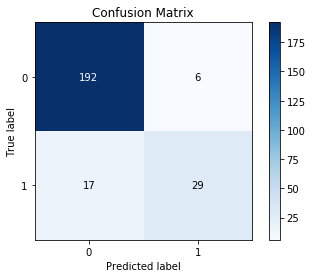

In [56]:
skplt.metrics.plot_confusion_matrix(Y_test, svm_pred, normalize=False)

In [59]:
print(classification_report(Y_test,svm_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       198
          1       0.83      0.63      0.72        46

avg / total       0.90      0.91      0.90       244



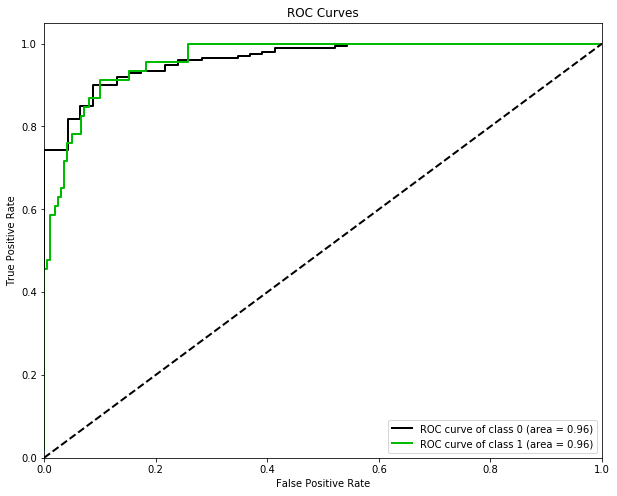

In [60]:
skplt.metrics.plot_roc(Y_test, svm_Ppred,figsize=(10,8),plot_macro=False,plot_micro=False)

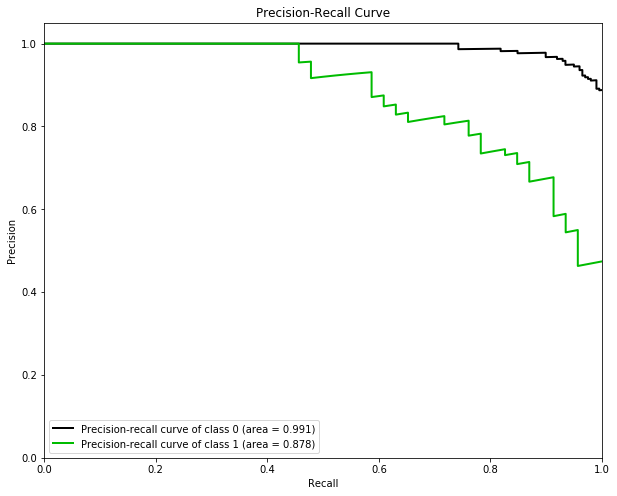

In [62]:
plt.figure()
skplt.metrics.plot_precision_recall(Y_test, svm_Ppred,plot_micro=False,figsize=(10,8))
plt.show()

### SVM with cross validation using GridSearch

In [22]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters =  {'kernel':('linear','rbf'), 'C':[1, 10 , 50 , 100,200]}
cv = 6
grid = GridSearchCV(svm.SVC(probability=True),param_grid=parameters,cv=cv,return_train_score = True)
grid.fit(X_train,Y_train)

GridSearchCV(cv=6, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [55]:
svm_pred1 = grid.predict(X_test)

In [54]:
svm_Ppred1 = grid.predict_proba(X_test)

In [56]:
grid.score(X_test,Y_test)

0.91393442622950816

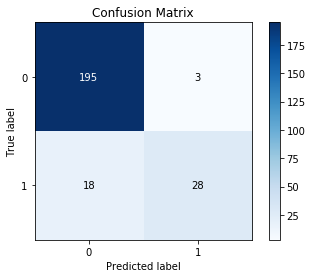

In [57]:
skplt.metrics.plot_confusion_matrix(Y_test, svm_pred1, normalize=False)

In [58]:
print(classification_report(Y_test,svm_pred1))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       198
          1       0.90      0.61      0.73        46

avg / total       0.91      0.91      0.91       244



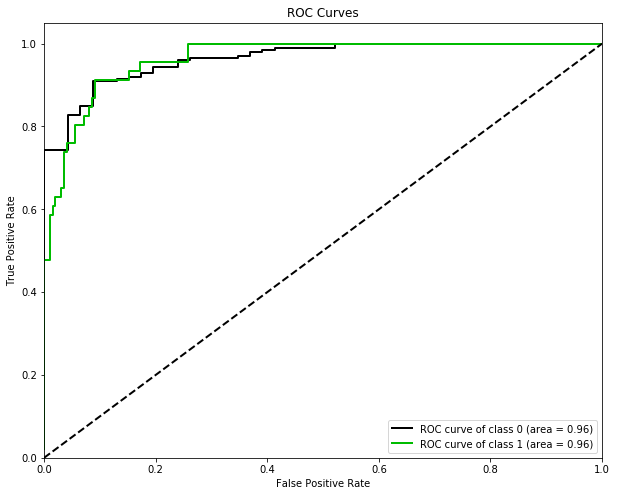

In [59]:
skplt.metrics.plot_roc(Y_test, svm_Ppred1,figsize=(10,8),plot_macro=False,plot_micro=False)

### SVM using cross_val_score. This method will perform cross validation and we can extract support vectors from the model

In [77]:
#SVM using cross validation using kernel linear 
from sklearn.model_selection import cross_val_score
C = [1, 10 , 50 , 100,200]
accuracy = []
for c in C:
    print('c',c)
    clf2 = svm.SVC(kernel='linear', C=c,probability=True)
    acc = np.mean(cross_val_score(clf2, 
                                     X_train, 
                                     Y_train, 
                                     cv=10))    
    print(c,acc)
    clf2.fit(X_train,Y_train)
    accuracy.append(acc)




c 1
1 0.919859825373
c 10
10 0.912664150712
c 50
50 0.912685409215
c 100
100 0.911643742549
c 200
200 0.911633003717


In [78]:
clf2.n_support_

array([89, 85], dtype=int32)

In [ ]:
clf2.

In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.03)


In [79]:
svm_pred2 = clf2.predict(X_test)

In [80]:
svm_Ppred2 = clf2.predict_proba(X_test)

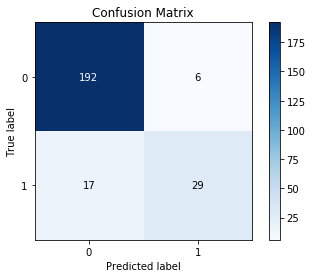

In [81]:
skplt.metrics.plot_confusion_matrix(Y_test, svm_pred2, normalize=False)

In [82]:
print(classification_report(Y_test,svm_pred2))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       198
          1       0.83      0.63      0.72        46

avg / total       0.90      0.91      0.90       244



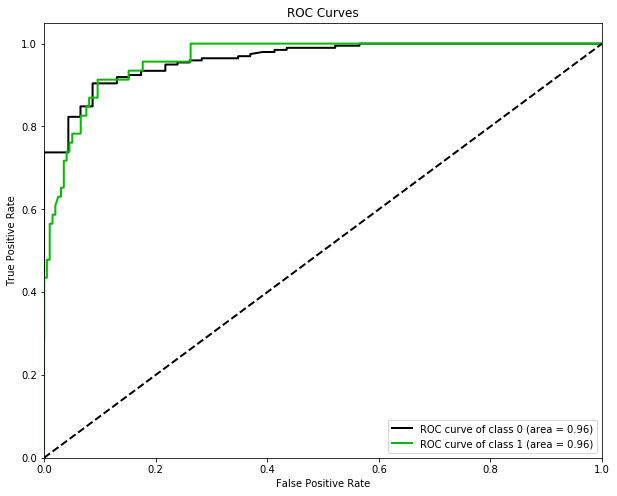

In [83]:
skplt.metrics.plot_roc(Y_test, svm_Ppred2,figsize=(10,8),plot_macro=False,plot_micro=False)